In [1]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

import numpy as np 
import pandas as pd 
from numpy import save

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 


In [2]:
dataset = pd.read_csv("A_Z Handwritten Data/A_Z Handwritten Data.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

X = dataset.drop('label',axis = 1)
y = dataset['label']

# Explorando

In [3]:
print("furmato:",X.shape)
print("such colonas much qtd:",len(X.iloc[1]))
print("784 = 28 X 28")

X.head()

furmato: (372450, 784)
such colonas much qtd: 784
784 = 28 X 28


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# look at her, then look at the data images
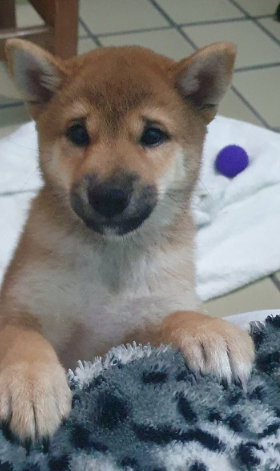

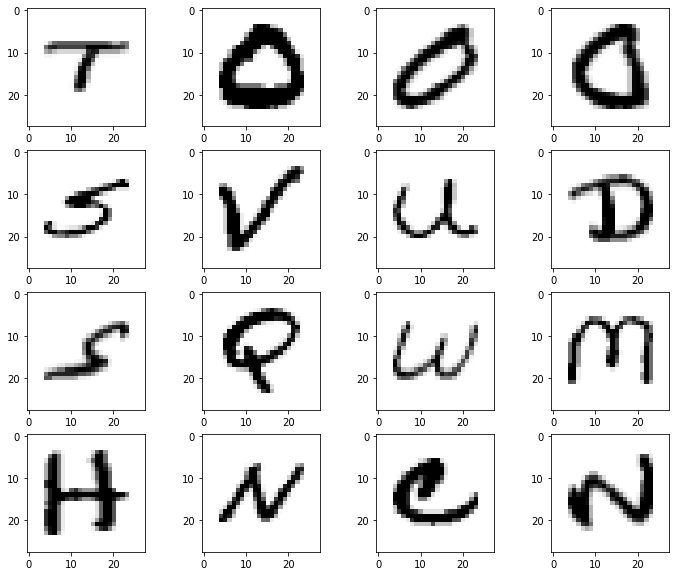

In [4]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

# Data preparation

In [5]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [6]:
print('x_train shape ', X_train.shape)
print('x test shape ', X_test.shape)
print('y train shape ', y_train.shape)
print('y test shape ', y_test.shape)

x_train shape  (279337, 784)
x test shape  (93113, 784)
y train shape  (279337,)
y test shape  (93113,)


Data after scaler


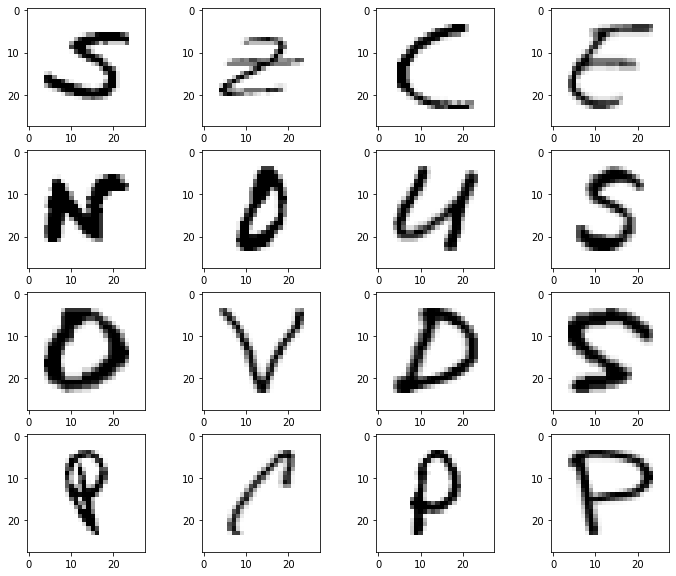

In [7]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [9]:
print('x_train shape ', X_train.shape)
print('x test shape ', X_test.shape)
print('y train shape ', y_train.shape)
print('y test shape ', y_test.shape)

x_train shape  (279337, 28, 28, 1)
x test shape  (93113, 28, 28, 1)
y train shape  (279337, 26)
y test shape  (93113, 26)


In [10]:
save('X_train.npy', X_train)
save('X_test.npy', X_test)
save('y_train.npy', y_train)
save('y_test.npy', y_test)